In [2]:
# from pororo import Pororo
import pandas as pd
from sentence_transformers import util
import torch
import numpy as np
import csv

c:\Users\KOREAVC\anaconda3\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [4]:
import enum
import os
import re
from sklearn.model_selection import train_test_split
import numpy as np
from glob import glob
import json
# from configs import DEFINES #config파일 사용위해
from tqdm import tqdm #진행속도를 알려줌

In [5]:
from konlpy.tag import Komoran

# 코모란 형태소 분석기 객체 생성
komoran=Komoran()
text=question[500]
morphs=komoran.morphs(text)

print(morphs)

NameError: name 'question' is not defined

In [89]:
#형태소와 품사 태그 추출
pos=komoran.pos(text)
print(pos)

#명사만 추출
noun=komoran.nouns(text)
print(noun)

[('알츠하이머병', 'NNP'), ('의', 'JKG'), ('증상', 'NNP'), ('중', 'NNB'), ('에서', 'JKB'), ('특히', 'MAG'), ('조심', 'NNG'), ('하', 'XSV'), ('아야', 'EC'), ('하', 'VV'), ('ㄹ', 'ETM'), ('것', 'NNB'), ('은', 'JX'), ('무엇', 'NP'), ('이', 'VCP'), ('ㄴ가요', 'EF'), ('?', 'SF')]
['알츠하이머병', '증상', '중', '조심', '것']


In [90]:
from konlpy.tag import Komoran

komoran = Komoran()
text = answer[900]
pos = komoran.pos(text)

print(pos)

[('알츠하이머병', 'NNP'), ('은', 'JX'), ('치매', 'NNP'), ('를', 'JKO'), ('일으키', 'VV'), ('는', 'ETM'), ('퇴행', 'NNG'), ('성', 'XSN'), ('뇌', 'NNG'), ('질환', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EF'), ('.', 'SF'), ('이', 'MM'), ('질병', 'NNP'), ('은', 'JX'), ('서서히', 'MAG'), ('진행', 'NNG'), ('되', 'XSV'), ('며', 'EC'), ('주로', 'MAG'), ('기억력', 'NNG'), ('저하', 'NNP'), ('와', 'JC'), ('성격', 'NNG'), ('변화', 'NNG'), ('등', 'NNB'), ('을', 'JKO'), ('일으키', 'VV'), ('ㅂ니다', 'EF'), ('.', 'SF'), ('알츠하이머병', 'NNP'), ('은', 'JX'), ('아', 'NNP'), ('밀로', 'NNP'), ('이드', 'NNP'), ('와', 'JC'), ('타우', 'NNP'), ('단백질', 'NNP'), ('의', 'JKG'), ('이상', 'NNG'), ('적', 'XSN'), ('이', 'VCP'), ('ㄴ', 'ETM'), ('축적', 'NNG'), ('으로', 'JKB'), ('특징', 'NNG'), ('지', 'VX'), ('어', 'EC'), ('지', 'VX'), ('ㅂ니다', 'EF'), ('.', 'SF'), ('초기', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('단순', 'XR'), ('하', 'XSA'), ('ㄴ', 'ETM'), ('기억상실', 'NNP'), ('증', 'NNG'), ('으로', 'JKB'), ('시작', 'NNG'), ('하', 'XSV'), ('아', 'EC'), ('혼란', 'NNG'), (',', 'SP'), ('혼란', 'NNG'), (',', 'SP'), ('혼동', 'NNP'), (','

In [7]:
komoran = Komoran(userdic = './user_dic.tsv')
text = "우리 챗봇은 **엔엘피**를 좋아해"
pos = komoran.pos(text)

print(pos)

[('우리', 'NP'), ('챗봇은', 'NA'), ('*', 'SW'), ('*', 'SW'), ('엔', 'NNB'), ('엘', 'NNP'), ('피', 'NNG'), ('*', 'SW'), ('*', 'SW'), ('를', 'JKO'), ('좋아하', 'VV'), ('아', 'EC')]


In [8]:
# def all_data():
#     question_path = './training/원천데이터/질문/알츠하이머병'
#     answer_path = './training/원천데이터/답변/알츠하이머병'
#     q_data=glob.glob(question_path + '/*/*.json')
#     a_data=glob.glob(answer_path + '/*/*.json')

#     return q_data, a_data

In [6]:
def all_data():
    question_path = './training/원천데이터/질문/알츠하이머병'
    answer_path = './training/원천데이터/답변/알츠하이머병'

    return glob.glob(question_path + '/*/*.json'), glob.glob(answer_path + '/*/*.json')

In [7]:
q_data,a_data = all_data()
q_data[3]

AttributeError: 'function' object has no attribute 'glob'

In [8]:
len(q_data), len(a_data)

NameError: name 'q_data' is not defined

In [12]:
with open(q_data[1000], 'r', encoding='utf-8') as file:
    json_data = json.load(file)
    print(json_data)

{'fileName': 'HC-Q-0332742', 'participantsInfo': {'participantID': 'QC015', 'gender': '남성', 'age': '50대 이상', 'occupation': '생산/노무직', 'history': False, 'rPlace': '부산/대구/울산/경상'}, 'disease_category': '뇌신경정신질환', 'disease_name': {'kor': '알츠하이머병', 'eng': "Alzheimer's disease"}, 'intention': '치료', 'question': '알츠하이머병 치료에는 어떤 방법들이 있는지 자세히 알고 싶어요.', 'entities': [{'id': 0, 'text': '알츠하이머병', 'entity': '질환명', 'position': 0}], 'num_of_words': 8}


In [13]:
q_list = []
for i in range(1000):
    with open(q_data[i], 'r', encoding='utf-8') as file:
        json_data = json.load(file)
        q_list.append(json_data['question'])
print(q_list)

['알츠하이머병의 원인으로 매일 소주를 섭취하는 것이 언급되고 있는데, 이에 대한 근거가 있는지 알려주세요.', '알츠하이머병이라는 질병은 유전적 영향을 받는 것인가요?', '알츠하이머병의 발생 원인에 대한 연구나 발견이 진행 중인가요?', '알츠하이머병의 발병과 관련하여 뇌의 노화로 인한 증상과 원인을 알려주세요.', '알츠하이머병의 원인과 관련된 연구 결과가 있을까요? 알려주세요.', '알츠하이머병의 원인은 무엇인가요?', '알츠하이머병이 발생하는 주요 원인은 무엇인가요?', '알츠하이머병 예방을 위해 매일 소주 한 병씩 섭취하는 것이 권장되는 이유가 무엇인가요?', '알츠하이머병과 다른 질병들이 발병하는 원인들에 대해 알려주세요.', '알츠하이머병이 발생하는데 영향을 미치는 주된 요인들은 어떤 것들이 있는지 알려주세요.', '알츠하이머병이 발생하는데에는 어떤 요인들이 영향을 미치나요?', '알츠하이머병과 치매 사이에는 어떠한 연관성이 있을까요?', '알츠하이머병의 원인 중 하나인 뇌의 노화에 대해서 자세히 알려주세요.', '알츠하이머병이 발생하는 주된 원인은 무엇인가요?', '알츠하이머병의 원인에는 가족력, 유전적 요인 이외에 다른 요인들이 있는지 자세히 알려주세요.', '알츠하이머병의 원인에 대해 상세하게 설명해주세요.', '알츠하이머병의 원인과 그에 따른 증상에 대해 알고 싶어요.', '알츠하이머병이 발생하는 주된 원인은 무엇인가요?', '알츠하이머병의 발생과정에서 어떤 요인이 가장 문제가 될 수 있는지 알려주세요.', '알츠하이머병과 관련된 감염균에 대한 정의와 특징을 알 수 있을까요?', '알츠하이머병의 원인이 30대에서 더 쉽게 찾아볼 수 있는 이유가 있나요?', '알츠하이머병의 원인에는 가족력, 유전적 요인 외에 다른 요인들이 있을까요?', '알츠하이머병의 원인과 관련된 다른 원인들을 알려주세요.', '알츠하이머병이 생기는 주된 원인은 무엇인가요?', '알츠하이머병과 다른 노화 현상들 사이에는 어떤 차이점이 있을까요?', '알츠하이머병의 발병 

In [14]:
json_data['intention']

'치료'

In [15]:
a_list = []
for i in range(1000):
    with open(a_data[i], 'r', encoding='utf-8') as file:
        json_data = json.load(file)
        sentence = ""
        for key in json_data['answer']:
            sentence += json_data['answer'][key]
        a_list.append(sentence)
print(len(a_list))

1000


In [16]:
i_list=[]
for i in range(1000):
    with open(q_data[i],'r',encoding='utf-8') as file:
        json_data=json.load(file)
        sentence = ""
        sentence += json_data['intention']
        i_list.append(sentence)
len(i_list)

1000

In [17]:
print(i_list)

['원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인', '원인

In [18]:
q_df = pd.DataFrame(q_list)
a_df = pd.DataFrame(a_list)
df = pd.concat((q_df, a_df), axis=1)
df.columns=['question', 'answer']

In [19]:
df[880:885]

,question,answer
880,알츠하이머병의 정의와 특징을 자세히 알려주세요.,"알츠하이머병은 치매의 한 형태로, 인지 기능의 저하를 일으키는 질병입니다. 이 질병..."
881,알츠하이머병 진단에 대해 자세히 알려주세요.,"알츠하이머병은 주로 치매의 주요 원인으로 알려져 있는 노인성 치매로서, 노인들 사이..."
882,알츠하이머병을 진단하기 위해 어떤 종류의 검사를 받아야 하나요?,알츠하이머병은 신경 세포가 파괴되어 뇌가 약화되고 비정상적인 신경 세포가 만들어지는...
883,알츠하이머병을 진단하기 위해 어떤 종류의 의학적 절차가 필요한지 알 수 있을까요?,"알츠하이머병은 치매와 함께 가장 흔한 퇴행성 뇌질환이며, 주로 노년층에서 발생하는 ..."
884,알츠하이머병 진단을 위해 어떤 절차를 따라야 하는지 알려주세요.,알츠하이머병은 뇌 신경세포의 소실로 인해 생기는 치매를 말합니다. 이 질환은 점진적...


In [20]:
# q_df = pd.DataFrame(q_list)
# a_df = pd.DataFrame(a_list)
# i_df = pd.DataFrame(i_list)
# df = pd.concat((q_df, a_df,i_df), axis=1)
# df.columns=['question', 'answer','intention']

In [21]:
df.insert(loc=2, column='intention', value=i_list)

In [22]:
df[600:610]

,question,answer,intention
600,알츠하이머병의 주요 증상을 자세히 설명해주세요.,"알츠하이머병은 치매를 일으키는 퇴행성 뇌질환으로, 주로 노인들에게서 발생합니다.알츠...",증상
601,알츠하이머병의 증상이 기억력 감퇴와 어떤 관련이 있는지 알려주세요.,알츠하이머병은 치매의 대표적인 원인으로 알려져 있는 신경퇴행성 질환입니다.알츠하이머...,증상
602,알츠하이머병의 증상은 어떤 것들이 있는지 알려주세요.,"치매는 뇌세포의 파괴로 인해 뇌 기능의 장애가 발생하는 퇴행성 질환이며, 정상적인 ...",증상
603,알츠하이머병에 걸렸을 때 일반인이 보통 어떤 증상을 경험하게 되나요?,"알츠하이머병은 치매의 원인으로 알려져 있지만, 사실은 아밀로이드의 축적과 관련이 있...",증상
604,알츠하이머병의 증상 중에서 가장 흔한 것은 무엇인가요?,알츠하이머병은 노인들 사이에서 가장 흔한 치매의 원인으로 알려져 있습니다.알츠하이머...,증상
605,알츠하이머병의 주요 증상과 그 특징적인 증상들에 대해 자세한 설명을 해주세요.,알츠하이머병은 신경학적인 장애를 일으키는 알츠하이머병의 심각한 퇴행성 뇌 질환입니다...,증상
606,알츠하이머병 환자가 느낄 수 있는 일반적인 증상이 어떤 것들이 있나요?,"알츠하이머병은 퇴행성 뇌질환으로, 노인들의 인지 기능이 점차적으로 악화되어 가는 질...",증상
607,알츠하이머병 초기 단계의 초기 증상 중 기억력이 저하되는 것 외에 다른 증상이 있을까요?,"알츠하이머병은 치매와 유사한 치매의 가장 흔한 유형이며, 노화와 다양한 원인에 의해...",증상
608,알츠하이머병에는 기억력 감퇴 이외에도 어떤 신체적인 이상 증상이 나타날 수 있는지 ...,"알츠하이머병은 치매를 일으키는 가장 흔한 퇴행성 뇌질환으로, 서서히 진행되어 기억력...",증상
609,알츠하이머병의 주요 증상 중 가까운 기억들을 잘 떠올리지 못하는 것이 포함되는 건가요?,"알츠하이머병은 뇌의 퇴행성 질환으로, 아밀로이드 단백질과 타우 단백질의 이상으로 인...",증상


In [23]:
df.iloc[550]

question                              알츠하이머병과 치매는 서로 다른 질병인가요?
answer       알츠하이머병은 신경퇴행성 질환으로, 기억력 저하와 인지 기능 손상을 초래합니다.알츠...
intention                                                   증상
Name: 550, dtype: object

In [24]:
with open(a_data[1000], 'r', encoding='utf-8') as file:
    json_data = json.load(file)
    print(json_data)

{'fileName': 'HC-A-02138665', 'disease_category': '뇌신경정신질환', 'disease_name': {'kor': '알츠하이머병', 'eng': "Alzheimer's disease"}, 'department': ['정신건강의학과', '신경과', '신경외과'], 'intention': '정의', 'answer': {'intro': '알츠하이머병은 신경퇴행성질환의 일종으로, 뇌의 신경세포 소실로 인해 기억력이 손상되는 질환입니다. 이 질병은 서서히 진행되며, 환자는 자신의 기억력을 잃게 됩니다.', 'body': '알츠하이머병은 노인들 사이에서 가장 흔하게 발병하는 치매로, 기억상실과 같은 인지능력 저하가 특징입니다. 일부 환자는 새로운 기억이나 문제 해결 능력이 감소하는 특징을 보이며, 다른 환자들은 기억력을 잃은 후에도 언어기능이나 판단력에는 영향이 없을 수 있습니다.', 'conclusion': '알츠하이머병을 관리하기 위해 기억력과 인지능력을 보존하기 위해 다양한 치료 방법이 있습니다. 이러한 치료 전략은 환자의 인지기능 손실을 지연시키고 일상생활을 유지하는데 도움을 줄 수 있습니다.'}, 'num_of_words': 76}


In [25]:
with open(q_data[1000], 'r', encoding='utf-8') as file:
    json_data = json.load(file)
    print(json_data['question'])

알츠하이머병 치료에는 어떤 방법들이 있는지 자세히 알고 싶어요.


In [26]:
df.to_csv("Alz.csv", sep=',')
df.tail()

,question,answer,intention
995,알츠하이머병을 초기에 치료하면 어떤 점이 좋을까요?,알츠하이머병은 주로 노인들에서 발견되는 치매의 가장 흔한 형태입니다. 이 질병은 최...,치료
996,알츠하이머병을 치료하기 위한 다른 치료법은 없을까요?,"알츠하이머병은 뇌 조직의 이상으로 인한 퇴행성 신경 질환으로, 주로 노년층에서 발생...",치료
997,알츠하이머병 치료에 있어서 가장 효과적인 방법은 무엇인가요?,알츠하이머병은 노인들에게서 흔히 발생하는 치매의 한 형태입니다. 아밀로이드 단백질과...,치료
998,알츠하이머병을 치료하는데 있어서 어떤 종류의 약물이 사용되는지 자세히 알려주세요.,알츠하이머병은 노인들이 흔히 겪는 치매를 일으키는 퇴행성 신경질환입니다. 뇌세포에 ...,치료
999,알츠하이머병을 치료하기 위해 주로 사용되는 치료법은 무엇인가요?,알츠하이머병은 현재까지의 많은 연구를 통해 예방과 조기 진단을 통해 진행을 억제할 ...,치료


In [27]:
question = df['question']
answer = df['answer']
df['question']

0      알츠하이머병의 원인으로 매일 소주를 섭취하는 것이 언급되고 있는데, 이에 대한 근거...
1                         알츠하이머병이라는 질병은 유전적 영향을 받는 것인가요?
2                     알츠하이머병의 발생 원인에 대한 연구나 발견이 진행 중인가요?
3              알츠하이머병의 발병과 관련하여 뇌의 노화로 인한 증상과 원인을 알려주세요.
4                    알츠하이머병의 원인과 관련된 연구 결과가 있을까요? 알려주세요.
                             ...                        
995                         알츠하이머병을 초기에 치료하면 어떤 점이 좋을까요?
996                        알츠하이머병을 치료하기 위한 다른 치료법은 없을까요?
997                    알츠하이머병 치료에 있어서 가장 효과적인 방법은 무엇인가요?
998        알츠하이머병을 치료하는데 있어서 어떤 종류의 약물이 사용되는지 자세히 알려주세요.
999                  알츠하이머병을 치료하기 위해 주로 사용되는 치료법은 무엇인가요?
Name: question, Length: 1000, dtype: object

In [28]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [29]:
import konlpy.tag

In [30]:
from konlpy.tag import Okt
from mecab import MeCab

# 형태소 분석기
mecab = MeCab()
okt = Okt()

In [31]:
from mecab import MeCab
mecab = MeCab()

In [32]:
# text = question[100]
text= answer[800]
pos = mecab.pos(text)
print(pos)

[('알츠하이머병', 'NNG'), ('은', 'JX'), ('기억력', 'NNG'), ('과', 'JC'), ('판단력', 'NNG'), ('을', 'JKO'), ('담당', 'NNG'), ('하', 'XSV'), ('는', 'ETM'), ('뇌', 'NNG'), ('의', 'JKG'), ('인지', 'NNG'), ('기능', 'NNG'), ('에', 'JKB'), ('손상', 'NNG'), ('을', 'JKO'), ('초래', 'NNG'), ('하', 'XSV'), ('는', 'ETM'), ('퇴행', 'NNG'), ('성', 'XSN'), ('신경', 'NNG'), ('질환', 'NNG'), ('입니다', 'VCP+EF'), ('.', 'SF'), ('알츠하이머병', 'NNG'), ('은', 'JX'), ('주로', 'MAG'), ('기억력', 'NNG'), ('저하', 'NNG'), ('가', 'JKS'), ('특징', 'NNG'), ('적', 'XSN'), ('인', 'VCP+ETM'), ('증상', 'NNG'), ('입니다', 'VCP+EF'), ('.', 'SF'), ('처음', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('최근', 'NNG'), ('에', 'JKB'), ('발생', 'NNG'), ('한', 'XSV+ETM'), ('일', 'NNG'), ('을', 'JKO'), ('기억', 'NNG'), ('하', 'XSV'), ('는', 'ETM'), ('능력', 'NNG'), ('이', 'JKS'), ('점점', 'MAG'), ('약해', 'VA+EC'), ('지', 'VX'), ('다가', 'EC'), (',', 'SC'), ('이후', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('완전히', 'MAG'), ('상실', 'NNG'), ('됩니다', 'XSV+EF'), ('.', 'SF'), ('이러', 'XR'), ('한', 'XSA+ETM'), ('증상', 'NNG'), ('들', 'XSN'), ('

In [33]:
import re

# 한글, 영어, 숫자, 공백, ?!.,을 제외한 나머지 문자 제거
korean_pattern = r'[^ ?,.!A-Za-z0-9가-힣+]'

# 패턴 컴파일
normalizer = re.compile(korean_pattern)
normalizer

re.compile(r'[^ ?,.!A-Za-z0-9가-힣+]', re.UNICODE)

In [34]:
print(f'수정 전: {question[20]}')
print(f'수정 후: {normalizer.sub("", question[20])}')
print(f'수정 전: {answer[20]}')
print(f'수정 후: {normalizer.sub("", answer[20])}')

수정 전: 알츠하이머병의 원인이 30대에서 더 쉽게 찾아볼 수 있는 이유가 있나요?
수정 후: 알츠하이머병의 원인이 30대에서 더 쉽게 찾아볼 수 있는 이유가 있나요?
수정 전: 알츠하이머병은 노화된 단백질이 뇌세포를 파괴하는 퇴행성 신경 질환입니다. 이 질환은 노화에 따른 뇌신경세포의 죽음으로 인해 발생하며, 정확한 원인은 알려져 있지 않습니다. 초기 증상은 경미한 기억 장애부터 언어 장애, 행동 변화 등으로 나타납니다.알츠하이머병은 점진적인 기억력 감퇴와 언어 장애, 실행증(실어증), 시공간능력 장애, 행동 및 정신행동 증상 등을 보입니다. 진행되면서 불안, 우울, 난폭성 등과 같은 정신증상도 나타날 수 있습니다.알츠하이머병은 치료가 불가능한 질환이지만, 조기에 진단을 받고 적절한 치료와 관리를 시작하는 것이 중요합니다. 이를 통해 삶의 질을 향상시키고 증상을 완화시킬 수 있습니다.
수정 후: 알츠하이머병은 노화된 단백질이 뇌세포를 파괴하는 퇴행성 신경 질환입니다. 이 질환은 노화에 따른 뇌신경세포의 죽음으로 인해 발생하며, 정확한 원인은 알려져 있지 않습니다. 초기 증상은 경미한 기억 장애부터 언어 장애, 행동 변화 등으로 나타납니다.알츠하이머병은 점진적인 기억력 감퇴와 언어 장애, 실행증실어증, 시공간능력 장애, 행동 및 정신행동 증상 등을 보입니다. 진행되면서 불안, 우울, 난폭성 등과 같은 정신증상도 나타날 수 있습니다.알츠하이머병은 치료가 불가능한 질환이지만, 조기에 진단을 받고 적절한 치료와 관리를 시작하는 것이 중요합니다. 이를 통해 삶의 질을 향상시키고 증상을 완화시킬 수 있습니다.


In [35]:
def normalize(sentence):
    return normalizer.sub("", sentence)

normalize(question[200])

'알츠하이머병 예방을 위해 매일 소주 한 병씩 섭취하는 것이 권장되는 이유가 있나요?'

In [36]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [37]:
mecab.morphs(normalize(question[100]))

['알츠하이머병',
 '의',
 '원인',
 '중',
 '에서',
 '노화',
 '외',
 '에',
 '다른',
 '요인',
 '도',
 '알려',
 '주',
 '세요',
 '.']

In [38]:
# 한글 전처리를 함수화
def clean_text(sentence, tagger):
    sentence = normalize(sentence)
    sentence = tagger.morphs(sentence)
    sentence = ' '.join(sentence)
    sentence = sentence.lower()
    return sentence

In [39]:
# 한글
clean_text(question[20], okt)
clean_text(answer[20], okt)

'알츠하이머병 은 노화 된 단백질 이 뇌 세포 를 파괴 하는 퇴 행성 신경 질환 입니다 . 이 질환 은 노화 에 따른 뇌신경 세포 의 죽음 으로 인해 발생 하며 , 정확한 원인 은 알려져 있지 않습니다 . 초기 증상 은 경미한 기억 장애 부터 언어 장애 , 행동 변화 등 으로 나타납니다 . 알츠하이머병 은 점진 적 인 기억 력 감퇴 와 언어 장애 , 실행증 실어증 , 시공간 능력 장애 , 행동 및 정신 행동 증상 등 을 보입니다 . 진행 되면서 불안 , 우울 , 난폭 성 등 과 같은 정신증 상도 나타날 수 있습니다 . 알츠하이머병 은 치료 가 불가능한 질환 이지만 , 조기 에 진단 을 받고 적절한 치료 와 관리 를 시작 하는 것 이 중요합니다 . 이를 통해 삶 의 질 을 향상 시키고 증상 을 완화 시킬 수 있습니다 .'

In [40]:
len(question), len(answer)

(1000, 1000)

In [41]:
questions = [clean_text(sent, okt) for sent in question.values[:1000]]
answers = [clean_text(sent, okt) for sent in answer.values[:1000]]

In [42]:
questions[:5]

['알츠하이머병 의 원인 으로 매일 소주 를 섭취 하는 것 이 언급 되고 있는데 , 이 에 대한 근거 가 있는지 알려주세요 .',
 '알츠하이머병 이라는 질병 은 유전 적 영향 을 받는 것 인가요 ?',
 '알츠하이머병 의 발생 원인 에 대한 연구 나 발견 이 진행 중 인가요 ?',
 '알츠하이머병 의 발병 과 관련 하여 뇌 의 노화 로 인한 증상 과 원인 을 알려주세요 .',
 '알츠하이머병 의 원인 과 관련 된 연구 결과 가 있을까요 ? 알려주세요 .']

In [43]:
answers[:5]

['알츠하이머병 의 정확한 원인 은 아직 밝혀지지 않았지만 , 연구 들 이 알츠하이머병 의 발병 기전 에 대해 논의 하고 있습니다 . 일부 연구 에 따르면 , 유전 적 인 요소 와 뇌 의 기능 손상 이 관련 되어 있다고 알려져 있습니다 . 알츠하이머병 은 아밀로이드 베타 단백질 과 타우 단백질 의 과도 한 생 성 , 뇌 세포 의 비정상 적 인 활동 , 뇌 조직 의 변화 로 인해 발생 하는 것 으로 생각 되고 있습니다 . 이러한 변화 가 알츠하이머병 의 발병 위험 을 증가 시키고 , 병 의 진행 을 가속 화 시킨다는 것 입니다 . 알츠하이머병 의 발병 과 관련 된 위험 요소 에 대해 서는 더 많은 연구 와 조사 가 필요합니다 . 더 많은 연구 와 자료 수집 을 통해 알츠하이머병 에 대한 더 많은 이해 와 예방 방법 이 개발 될 것 으로 기대 됩니다 .',
 '알츠하이머병 은 현재 까지 완전한 원인 이 밝혀지지 않았습니다 . 알츠하이머병 은 아직 완전히 이해 되지 않았지만 , 연구 결과 에 따르면 유전 적 인 요소 와 다양한 환경 적 인 요인 이 이 질환 을 일으키는 역할 을 한다고 알려져 있습니다 . 특히 , 아밀로이드 베타 단백질 의 비정상 적 인 축적 이 알츠하이머병 과 관련 이 있는 것 으로 알려져 있습니다 . 이 외 에도 나이 , 노화 , 고혈압 , 당뇨병 , 그리고 흡연 등 과 같은 다른 요인 들 도 알츠하이머병 발병 과 연관 성 이 있을 수 있습니다 . 더 많은 연구 와 조사 를 통해 알츠하이머병 의 원인 을 파악 하고 예방 방법 을 개발 할 필요 가 있습니다 .',
 '알츠하이머병 은 치매 를 일으키는 가장 흔한 퇴 행성 뇌 질환 으로 , 1907년 독일 의사 알 로이스 알츠하이머 에 의해 처음 으로 보고 되었습니다 . 이 질환 의 원인 에 대해 서는 현재 까지 명확한 답 은 없으나 , 치매 발생 의 위험 요소 와 관련 하여 몇 가지 위험 요인 이 알려져 있습니다 . 일반 적 으로 , 가장 잘 알려진 요인 중 하나 는 고령 입니다 . 고령 은 치매 

In [91]:
from konlpy.tag import Komoran
import numpy as np

komoran = Komoran()
text = "오늘 날씨는 구름이 많아요."

# 문장에서 명사만 추출
nouns = komoran.nouns(text)

# 단어 사전 구축 및 단어별 인덱스 부여
dics = {}
for word in nouns:
  if word not in dics.keys(): # 이미 저장된 단어는 다시 저장하지 않음
    dics[word] = len(dics) # key가 단어, value가 인덱스

# 원-핫 벡터 차원의 크기는 단어 사전의 크기
nb_classes = len(dics)

# 단어별 인덱스값을 리스트로 변환
targets = list(dics.values())

# 원-핫 벡터 생성
one_hot_targets = np.eye(nb_classes) # nb_classes 크기대로 단위행렬을 반환
one_hot_targets = one_hot_targets[targets] # 단위행렬을 단어 사전의 순서에 맞게 정렬
print(one_hot_targets)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [93]:
!pip install gensim

     ---------------------------------------- 24.0/24.0 MB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 61.2/61.2 kB ? eta 0:00:00
     ------------------------------------- 983.8/983.8 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: Cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [94]:
from gensim.models import Word2Vec
from konlpy.tag import Komoran
import time

In [102]:

# 학습 시간 측정 시작
start = time.time()

# 리뷰 파일 읽어오기
print('1) 말뭉치 데이터 읽기 시작')
print('1) 말뭉치 데이터 읽기 완료 : ', time.time() - start)

# 문장 단위로 명사만 추출해 학습 입력 데이터로 만듦
print('2) 형태소에서 명사만 추출 시작')
komoran = Komoran()
df=pd.read_csv('chatbot_data.csv')
docs = [komoran.nouns(question[1]) for question in df]
print('2) 형태소에서 명사만 추출 완료 : ', time.time() - start)

# Word2Vec 모델 학습
print('3) Word2Vec 모델 학습 시작')
model = Word2Vec(sentences=docs, window=4, hs=1, min_count=2, sg=1)
print('3) Word2Vec 모델 학습 완료 : ', time.time() - start)

# 모델 저장
print('4) 학습된 모델 저장 시작')
model.save('nvmc.model')
print('4) 학습된 모델 저장 완료 : ', time.time() - start)

# 학습된 말뭉치 수, 코퍼스 내 전체 단어 수
print("corpus_count : ", model.corpus_count)
print("corpus_total_words : ", model.corpus_total_words)

1) 말뭉치 데이터 읽기 시작
1) 말뭉치 데이터 읽기 완료 :  0.0
2) 형태소에서 명사만 추출 시작


IndexError: string index out of range

In [105]:
!pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 6.6 MB/s eta 0:00:00
     -------------------------------------- 896.6/896.6 kB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 4.5/4.5 MB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 6.0 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 9.8 MB/s eta 0:00:00
     -------------------------------------- 195.5

In [5]:
# 필요한 모듈 임포트
import pandas as pd
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, Conv1D, GlobalMaxPool1D, concatenate

# 데이터 읽어오기
data = pd.read_csv("chatbot_data.csv")
features = data['Q'].tolist()
labels = data['label'].tolist()
data.head()
#label 0,1,2 : 일상다반사/부정/긍정

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [19]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM, SimpleRNN

# time step만큼 시퀀스 데이터 분리
def split_sequence(sequence, step):
  x, y = list(), list()

  for i in range(len(sequence)):
    end_idx = i + step
    if end_idx > len(sequence) - 1:
      break

    seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
    x.append(seq_x)
    y.append(seq_y)

  return np.array(x), np.array(y)


# sin 함수 학습 데이터
x = [i for i in np.arange(start=-10, stop=10, step=0.1)]
train_y = [np.sin(i) for i in x]

In [20]:
# 하이퍼파라미터
n_timesteps = 15
n_features = 1

# 시퀀스 나누기
# train_x.shape => (samples, timesteps)
# train_y.shape => (samples)
train_x, train_y = split_sequence(train_y, step=n_timesteps)
print("shape x:{} / y:{}".format(train_x.shape, train_y.shape))

shape x:(185, 15) / y:(185,)


In [21]:
# RNN 입력 벡터 크기를 맞추기 위해 벡터 차원 크기 변경
# reshape from [samples, timesteps] into [samples, timesteps, features]
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
print("train_x.shape = {}".format(train_x.shape))
print("train_y.shape = {}".format(train_y.shape))

train_x.shape = (185, 15, 1)
train_y.shape = (185,)


In [22]:
# RNN 모델 정의
model = Sequential()
model.add(SimpleRNN(units=10,
                    return_sequences=False,
                    input_shape=(n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

c:\Users\KOREAVC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# 모델 학습
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='loss',
    patience=5,
    mode='auto'
)
history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping])

Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2982
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1899 
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1357 
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0889 
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0644 
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0567 
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0381 
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0309 
Epoch 9/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0228 
Epoch 10/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0195 
Epoch 11/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0180 
Epoch 12/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0177 
Epoch 13/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0145 
Epoch 14/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0141 
Epoch 15/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0124 
Epoch

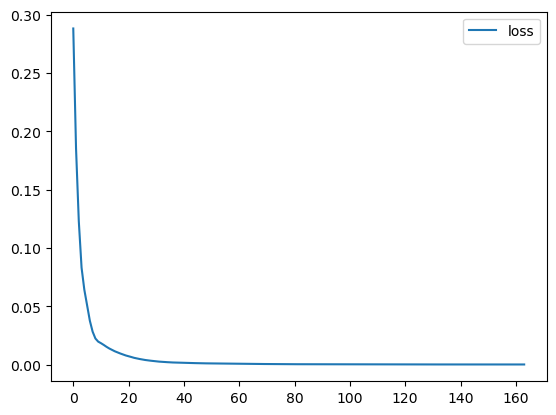

In [24]:
# loss 그래프 생성
plt.plot(history.history['loss'], label="loss")
plt.legend(loc="upper right")
plt.show()

In [25]:
# 테스트 데이터셋 생성
test_x = np.arange(10, 20, 0.1)
calc_y = np.cos(test_x) # 테스트 정답 데이터

# RNN 모델 예측 및 로그 저장
test_y = calc_y[:n_timesteps]
for i in range(len(test_x) - n_timesteps):
  net_input = test_y[i : i + n_timesteps]
  net_input = net_input.reshape((1, n_timesteps, n_features))
  train_y = model.predict(net_input, verbose=0)
  print(test_y.shape, train_y.shape, i, i + n_timesteps)
  test_y = np.append(test_y, train_y)

(15,) (1, 1) 0 15
(16,) (1, 1) 1 16
(17,) (1, 1) 2 17
(18,) (1, 1) 3 18
(19,) (1, 1) 4 19
(20,) (1, 1) 5 20
(21,) (1, 1) 6 21
(22,) (1, 1) 7 22
(23,) (1, 1) 8 23
(24,) (1, 1) 9 24
(25,) (1, 1) 10 25
(26,) (1, 1) 11 26
(27,) (1, 1) 12 27
(28,) (1, 1) 13 28
(29,) (1, 1) 14 29
(30,) (1, 1) 15 30
(31,) (1, 1) 16 31
(32,) (1, 1) 17 32
(33,) (1, 1) 18 33
(34,) (1, 1) 19 34
(35,) (1, 1) 20 35
(36,) (1, 1) 21 36
(37,) (1, 1) 22 37
(38,) (1, 1) 23 38
(39,) (1, 1) 24 39
(40,) (1, 1) 25 40
(41,) (1, 1) 26 41
(42,) (1, 1) 27 42
(43,) (1, 1) 28 43
(44,) (1, 1) 29 44
(45,) (1, 1) 30 45
(46,) (1, 1) 31 46
(47,) (1, 1) 32 47
(48,) (1, 1) 33 48
(49,) (1, 1) 34 49
(50,) (1, 1) 35 50
(51,) (1, 1) 36 51
(52,) (1, 1) 37 52
(53,) (1, 1) 38 53
(54,) (1, 1) 39 54
(55,) (1, 1) 40 55
(56,) (1, 1) 41 56
(57,) (1, 1) 42 57
(58,) (1, 1) 43 58
(59,) (1, 1) 44 59
(60,) (1, 1) 45 60
(61,) (1, 1) 46 61
(62,) (1, 1) 47 62
(63,) (1, 1) 48 63
(64,) (1, 1) 49 64
(65,) (1, 1) 50 65
(66,) (1, 1) 51 66
(67,) (1, 1) 52 67
(68

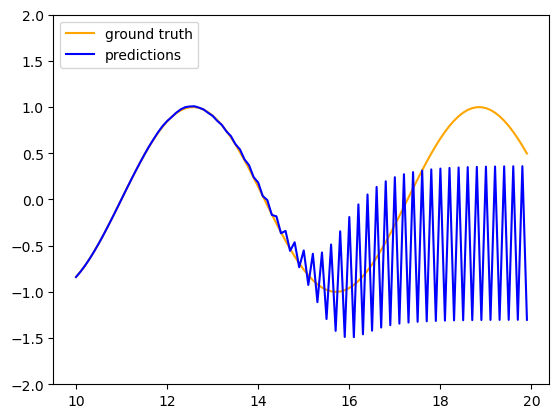

In [26]:
# 예측 결과 그래프 그리기
plt.plot(test_x, calc_y, label="ground truth", color="orange")
plt.plot(test_x, test_y, label="predictions", color="blue")

plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()

shape x:(185, 15) / y:(185,)
train_x.shape = (185, 15, 1)
train_y.shape = (185,)
Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8704
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8351 
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7616 
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6964 
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6301 
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5097 
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4749 
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4274 
Epoch 9/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3999 
Epoch 10/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3247 
Epoch 11/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3063 
Epoch 12/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2610 
Epoch 13/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2506 
Epoch 14/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss:

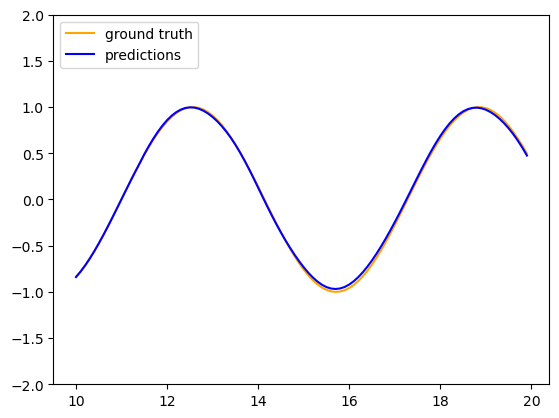

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM, SimpleRNN

# time step만큼 시퀀스 데이터 분리
def split_sequence(sequence, step):
  x, y = list(), list()

  for i in range(len(sequence)):
    end_idx = i + step
    if end_idx > len(sequence) - 1:
      break

    seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
    x.append(seq_x)
    y.append(seq_y)

  return np.array(x), np.array(y)


# sin 함수 학습 데이터
x = [i for i in np.arange(start=-10, stop=10, step=0.1)]
train_y = [np.sin(i) for i in x]

# 하이퍼파라미터
n_timesteps = 15
n_features = 1

# 시퀀스 나누기
# train_x.shape => (samples, timesteps)
# train_y.shape => (samples)
train_x, train_y = split_sequence(train_y, step=n_timesteps)
print("shape x:{} / y:{}".format(train_x.shape, train_y.shape))

# LSTM 입력 벡터 크기를 맞추기 위해 벡터 차원 크기 변경
# reshape from [samples, timesteps] into [samples, timesteps, features]
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
print("train_x.shape = {}".format(train_x.shape))
print("train_y.shape = {}".format(train_y.shape))

# LSTM 모델 정의
model = Sequential()
model.add(LSTM(units=10,
                    return_sequences=False,
                    input_shape=(n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 모델 학습
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='loss',
    patience=5,
    mode='auto'
)
history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping])

# 테스트 데이터셋 생성
test_x = np.arange(10, 20, 0.1)
calc_y = np.cos(test_x) # 테스트 정답 데이터

# LSTM 모델 예측 및 로그 저장
test_y = calc_y[:n_timesteps]
for i in range(len(test_x) - n_timesteps):
  net_input = test_y[i : i + n_timesteps]
  net_input = net_input.reshape((1, n_timesteps, n_features))
  train_y = model.predict(net_input)
  # print(test_y.shape, train_y.shape, i, i + n_timesteps)
  test_y = np.append(test_y, train_y)

# 예측 결과 그래프 그리기
plt.plot(test_x, calc_y, label="ground truth", color="orange")
plt.plot(test_x, test_y, label="predictions", color="blue")

plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()

In [28]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 20000  # 처음 2만개의 단어만 고려합니다
maxlen = 200  # 각 리뷰에 첫 200개의 단어만 고려합니다

In [29]:
# 가변 길이 정수 시퀀스를 입력합니다
inputs = keras.Input(shape=(None,), dtype="int32")
# 128차원 벡터에 각 정수를 포함합니다 
x = layers.Embedding(max_features, 128)(inputs)

# 양항향 LSTMs을 추가합니다
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# 분류기를 추가합니다
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, None, 128)      │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, None, 128)      │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,757,761 (10.52 MB)

 Trainable params: 2,757,761 (10.52 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words=max_features
)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

25000 Training sequences
25000 Validation sequences


In [31]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val))

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 109s 131ms/step - accuracy: 0.7611 - loss: 0.4737 - val_accuracy: 0.8546 - val_loss: 0.3379
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 127ms/step - accuracy: 0.9167 - loss: 0.2238 - val_accuracy: 0.8646 - val_loss: 0.3349


개체명 인식 Named Entity Recognition

In [34]:
import re
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/12.%20RNN%20Sequence%20Labeling/dataset/train.txt", filename="train.txt")

f = open('train.txt', 'r')
tagged_sentences = []
sentence = []

for line in f:
    if len(line)==0 or line.startswith('-DOCSTART') or line[0]=="\n":
        if len(sentence) > 0:
            tagged_sentences.append(sentence)
            sentence = []
        continue
    splits = line.split(' ') # 공백을 기준으로 속성을 구분한다.
    splits[-1] = re.sub(r'\n', '', splits[-1]) # 줄바꿈 표시 \n을 제거한다.
    word = splits[0].lower() # 단어들은 소문자로 바꿔서 저장한다.
    sentence.append([word, splits[-1]]) # 단어와 개체명 태깅만 기록한다.

print("전체 샘플 개수: ", len(tagged_sentences))
print('첫번째 샘플 :',tagged_sentences[1])

# 참고자료: https://wikidocs.net/24682

전체 샘플 개수:  14041
첫번째 샘플 : [['peter', 'B-PER'], ['blackburn', 'I-PER']]


In [6]:
corpus = [preprocessing.text.text_to_word_sequence(text) for text in features]

tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus) #texts_to_sequences() 함수를 이용해 모든 단어를 시퀀스 번호로 변환합니다.
word_index = tokenizer.word_index 


MAX_SEQ_LEN = 15  # 단어 시퀀스 벡터 크기를 임의로 넉넉하게 늘려서 설정합니다. 

padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

In [7]:
# 데이터를 랜덤하게 섞은 후 학습용, 검증용, 테스트용 데이터셋을 생성합니다.
# 학습셋:검증셋:테스트셋 = 7:2:1
ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features))
train_size = int(len(padded_seqs) * 0.7)
val_size = int(len(padded_seqs) * 0.2)
test_size = int(len(padded_seqs) * 0.1)
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).take(val_size).batch(20)
test_ds = ds.skip(train_size + val_size).take(test_size).batch(20)

# 하이퍼파라미터 설정
dropout_prob = 0.5
EMB_SIZE = 128
EPOCH = 5
VOCAB_SIZE = len(word_index) + 1  # 전체 단어 수

# 케라스 함수형 모델 방식으로 CNN 모델을 정의합니다. CNN 모델은 전처리된 입력 데이터를 단어 임베딩 처리하는 영역과 합성곱 필터와 연산을 통해 문장의 특징 정보(특징맵)를 추출하고, 평탄화하는 영역, 그리고 완전 연결계층을 통해 감정별로 클래스를 분류하는 영역으로 구성되어 있습니다.
input_layer = Input(shape=(MAX_SEQ_LEN,))
embedding_layer = Embedding(VOCAB_SIZE, EMB_SIZE, input_length=MAX_SEQ_LEN)(input_layer)
dropout_emb = Dropout(rate=dropout_prob)(embedding_layer)

c:\Users\KOREAVC\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
conv1 = Conv1D(filters=128, kernel_size=3, padding='valid', activation=tf.nn.relu)(dropout_emb)
pool1 = GlobalMaxPool1D()(conv1)
conv2 = Conv1D(filters=128, kernel_size=4, padding='valid', activation=tf.nn.relu)(dropout_emb)
pool2 = GlobalMaxPool1D()(conv2)
conv3 = Conv1D(filters=128, kernel_size=5, padding='valid', activation=tf.nn.relu)(dropout_emb)
pool3 = GlobalMaxPool1D()(conv3)

# 3, 4, 5- gram 이후 합치기
concat = concatenate([pool1, pool2, pool3])

In [9]:
hidden = Dense(128, activation=tf.nn.relu)(concat)
dropout_hidden = Dropout(rate=dropout_prob)(hidden)
logits = Dense(3, name='logits')(dropout_hidden)
predictions = Dense(3, activation=tf.nn.softmax)(logits)

In [32]:
print(hidden)

<KerasTensor shape=(None, 128), dtype=float32, sparse=False, name=keras_tensor_10>


In [10]:
# 모델 생성
model = Model(inputs=input_layer, outputs=predictions)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(train_ds, validation_data=val_ds, epochs=EPOCH, verbose=1) 

# 모델 평가(테스트 데이터셋 이용)
loss, accuracy = model.evaluate(test_ds, verbose=1)
print('Accuracy: %f' % (accuracy * 100))
print('loss: %f' % (loss))

# 모델 저장
model.save('cnn_model.h5')

Epoch 1/5
414/414 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5016 - loss: 0.9798 - val_accuracy: 0.7800 - val_loss: 0.6053
Epoch 2/5
414/414 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7772 - loss: 0.5656 - val_accuracy: 0.9234 - val_loss: 0.2625
Epoch 3/5
414/414 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8992 - loss: 0.3059 - val_accuracy: 0.9569 - val_loss: 0.1609
Epoch 4/5
414/414 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9354 - loss: 0.2049 - val_accuracy: 0.9691 - val_loss: 0.1120
Epoch 5/5
414/414 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9566 - loss: 0.1389 - val_accuracy: 0.9831 - val_loss: 0.0588
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9823 - loss: 0.0594


Accuracy: 97.969544
loss: 0.069299


In [15]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import preprocessing
# 테스트용 데이터셋 생성
ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features))
test_ds = ds.take(2000).batch(20) # 테스트 데이터셋

In [18]:
# 감정 분류 CNN 모델 불러오기
model = load_model('cnn_model.h5')
model.summary()
model.evaluate(test_ds, verbose=2)

# 테스트용 데이터셋의 10212번째 데이터 출력
print("단어 시퀀스 : ", corpus[10212])
print("단어 인덱스 시퀀스 : ", padded_seqs[10212])
print("문장 분류(정답) : ", labels[10212])

# 테스트용 데이터셋의 10212번째 데이터 감정 예측
picks = [10212]
predict = model.predict(padded_seqs[picks])
predict_class = tf.math.argmax(predict, axis=1)
print("감정 예측 점수 : ", predict)
print("감정 예측 클래스 : ", predict_class.numpy())

## 결과 : 실제 분류 클래스랑 예측한 감정 클래스가 동일한 결과를 보입니다.

TypeError: Error when deserializing class 'Dense' using config={'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 3, 'activation': {'module': 'builtins', 'class_name': 'function', 'config': 'softmax_v2', 'registered_name': 'function'}, 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}.

Exception encountered: Could not interpret activation function identifier: {'module': 'builtins', 'class_name': 'function', 'config': 'softmax_v2', 'registered_name': 'function'}

In [45]:
PAD_TOKEN = 0
SOS_TOKEN = 1
EOS_TOKEN = 2


class WordVocab():
    def __init__(self):
        self.word2index = {
            '<PAD>': PAD_TOKEN,
            '<SOS>': SOS_TOKEN, 
            '<EOS>': EOS_TOKEN,
        }
        self.word2count = {}
        self.index2word = {
            PAD_TOKEN: '<PAD>', 
            SOS_TOKEN: '<SOS>', 
            EOS_TOKEN: '<EOS>'
        }
        
        self.n_words = 3  # PAD, SOS, EOS 포함

    def add_sentence(self, sentence):
        for word in sentence.split(' '):
            self.add_word(word)

    def add_word(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [46]:
questions[925]

'알츠하이머병 의 진단 을 받을 수 있는 병원 을 알 고 싶습니다 .'

In [47]:
print(f'원문: {questions[550]}')
lang = WordVocab()
lang.add_sentence(questions[550])
print('==='*10)
print('[단어사전]')
print('***'*10)
print(lang.word2index)

원문: 알츠하이머병 과 치매 는 서로 다른 질병 인가요 ?
[단어사전]
******************************
{'<PAD>': 0, '<SOS>': 1, '<EOS>': 2, '알츠하이머병': 3, '과': 4, '치매': 5, '는': 6, '서로': 7, '다른': 8, '질병': 9, '인가요': 10, '?': 11}


In [48]:
max_length = 10
sentence_length = 6

sentence_tokens = np.random.randint(low=3, high=100, size=(sentence_length,))
sentence_tokens = sentence_tokens.tolist()
print(f'Generated Sentence: {sentence_tokens}')

sentence_tokens = sentence_tokens[:(max_length-1)]

token_length = len(sentence_tokens)

# 문장의 맨 끝부분에 <EOS> 토큰 추가
sentence_tokens.append(2)

for i in range(token_length, max_length-1):
    # 나머지 빈 곳에 <PAD> 토큰 추가
    sentence_tokens.append(0)

print(f'Output: {sentence_tokens}')
print(f'Total Length: {len(sentence_tokens)}')

Generated Sentence: [72, 28, 80, 25, 17, 58]
Output: [72, 28, 80, 25, 17, 58, 2, 0, 0, 0]
Total Length: 10


In [49]:
from konlpy.tag import Mecab, Okt
import re

class TextDataset(Dataset):
    def __init__(self, csv_path, min_length=3, max_length=32):
        super(TextDataset, self).__init__()
        # data_dir = 'data'
        
        # TOKEN 정의
        self.PAD_TOKEN = 0 # Padding 토큰
        self.SOS_TOKEN = 1 # SOS 토큰
        self.EOS_TOKEN = 2 # EOS 토큰
        
        self.tagger = MeCab()   # 형태소 분석기
        self.max_length = max_length # 한 문장의 최대 길이 지정
        
        # CSV 데이터 로드
        # df = pd.read_csv(os.path.join(data_dir, csv_path))
        df=pd.read_csv('Alz.csv')
        # 한글 정규화
        korean_pattern = r'[^ ?,.!A-Za-z0-9가-힣+]'
        self.normalizer = re.compile(korean_pattern)
        
        # src: 질의, tgt: 답변
        src_clean = []
        tgt_clean = []
        
        # 단어 사전 생성
        wordvocab = WordVocab()
        
        for _, row in df.iterrows():
            src = row['question']
            tgt = row['answer']
            
            # 한글 전처리
            src = self.clean_text(src)
            tgt = self.clean_text(tgt)
            
            if len(src.split()) > min_length and len(tgt.split()) > min_length:
                # 최소 길이를 넘어가는 문장의 단어만 추가
                wordvocab.add_sentence(src)
                wordvocab.add_sentence(tgt)
                src_clean.append(src)
                tgt_clean.append(tgt)            
        
        self.srcs = src_clean
        self.tgts = tgt_clean
        self.wordvocab = wordvocab

    
    def normalize(self, sentence):
        # 정규표현식에 따른 한글 정규화
        return self.normalizer.sub("", sentence)

    def clean_text(self, sentence):
        # 한글 정규화
        sentence = self.normalize(sentence)
        # 형태소 처리
        sentence = self.tagger.morphs(sentence)
        sentence = ' '.join(sentence)
        sentence = sentence.lower()
        return sentence
    
    def texts_to_sequences(self, sentence):
        # 문장 -> 시퀀스로 변환
        return [self.wordvocab.word2index[w] for w in sentence.split()]

    def pad_sequence(self, sentence_tokens):
        # 문장의 맨 끝 토큰은 제거
        sentence_tokens = sentence_tokens[:(self.max_length-1)]
        token_length = len(sentence_tokens)

        # 문장의 맨 끝부분에 <EOS> 토큰 추가
        sentence_tokens.append(self.EOS_TOKEN)

        for i in range(token_length, (self.max_length-1)):
            # 나머지 빈 곳에 <PAD> 토큰 추가
            sentence_tokens.append(self.PAD_TOKEN)
        return sentence_tokens
    
    def __getitem__(self, idx):
        inputs = self.srcs[idx]
        inputs_sequences = self.texts_to_sequences(inputs)
        inputs_padded = self.pad_sequence(inputs_sequences)
        
        outputs = self.tgts[idx]
        outputs_sequences = self.texts_to_sequences(outputs)
        outputs_padded = self.pad_sequence(outputs_sequences)
        
        return torch.tensor(inputs_padded), torch.tensor(outputs_padded)
    
    def __len__(self):
        return len(self.srcs)

In [50]:
# 한 문장의 최대 단어길이를 25로 설정
MAX_LENGTH = 25

dataset = TextDataset('Alz.csv', min_length=3, max_length=MAX_LENGTH)

In [51]:
# 10번째 데이터 임의 추출
x, y = dataset[10]

In [52]:
print(f'x shape: {x.shape}')
print(x)

print(f'y shape: {y.shape}')
print(y)

x shape: torch.Size([25])
tensor([  3,  14,  77,  11,  12, 405,  21,  12, 410, 120,  40,  14, 109,  81,
        361, 422, 112,   2,   0,   0,   0,   0,   0,   0,   0])
y shape: torch.Size([25])
tensor([  3,  32, 113, 114, 115,  31,   5,  81, 346, 139, 161,  12, 108,  89,
         29, 201, 164, 165, 138,  90,  49,  50, 120,  40,   2])


In [53]:
# 80%의 데이터를 train에 할당합니다.
train_size = int(len(dataset) * 0.8)
train_size

800

In [54]:
# 나머지 20% 데이터를 test에 할당합니다.
test_size = len(dataset) - train_size
test_size

200

In [55]:
from torch.utils.data import random_split

# 랜덤 스플릿으로 분할을 완료합니다.
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

DataLoader생성
-배치 구성을 쉽게 하기 위해서 torch.utils.data.DataLoader를 활용합니다.
-train/test 데이터셋 모두 batch_size=16 으로 설정하겠습니다.

In [56]:
from torch.utils.data import DataLoader, SubsetRandomSampler

train_loader = DataLoader(train_dataset, 
                          batch_size=16, 
                          shuffle=True)

test_loader = DataLoader(test_dataset, 
                         batch_size=16, 
                         shuffle=True)

In [57]:
# 1개의 배치 데이터를 추출합니다.
x, y = next(iter(train_loader))

In [58]:
# shape: (batch_size, sequence_length)
x.shape, y.shape

(torch.Size([16, 25]), torch.Size([16, 25]))

모델/Encoder

In [59]:
class Encoder(nn.Module):
    def __init__(self, num_vocabs, hidden_size, embedding_dim, num_layers):
        super(Encoder, self).__init__()
        
        # 단어 사전의 개수 지정
        self.num_vocabs = num_vocabs
        # 임베딩 레이어 정의 (number of vocabs, embedding dimension)
        self.embedding = nn.Embedding(num_vocabs, embedding_dim)
        # GRU (embedding dimension)
        self.gru = nn.GRU(embedding_dim, 
                          hidden_size, 
                          num_layers=num_layers, 
                          bidirectional=False)
        
    def forward(self, x):
        x = self.embedding(x).permute(1, 0, 2)
        output, hidden = self.gru(x)
        return output, hidden

In [60]:
# Embedding Layer의 입/출력 shape에 대한 이해

embedding_dim = 64 # 임베딩 차원
embedding = nn.Embedding(dataset.wordvocab.n_words, embedding_dim)

# x의 shape을 변경합니다.
# (batch_size, sequence_length) => (sequence_length, batch_size)
embedded = embedding(x)

print(x.shape)
print(embedded.shape)
# input:  (sequence_length, batch_size)
# output: (sequence_length, batch_size, embedding_dim)

torch.Size([16, 25])
torch.Size([16, 25, 64])


In [61]:
embedded = embedded.permute(1, 0, 2)
print(embedded.shape)
# (sequence_length, batch_size, embedding_dim)


torch.Size([25, 16, 64])


In [62]:
hidden_size = 32   

gru = nn.GRU(embedding_dim,      # embedding 차원
             hidden_size, 
             num_layers=1, 
             bidirectional=False)

# input       : (sequence_length, batch_size, embedding_dim)
# h0          : (Bidirectional(1) x number of layers(1), batch_size, hidden_size)
o, h = gru(embedded, None)

print(o.shape)
print(h.shape)
# output      : (sequence_length, batch_size, hidden_size x bidirectional(1))
# hidden_state: (bidirectional(1) x number of layers(1), batch_size, hidden_size)

torch.Size([25, 16, 32])
torch.Size([1, 16, 32])


In [63]:
NUM_VOCABS = dataset.wordvocab.n_words
print(f'number of vocabs: {NUM_VOCABS}')

number of vocabs: 2206


In [64]:
# Encoder 정의
encoder = Encoder(NUM_VOCABS, 
                  hidden_size=32, 
                  embedding_dim=64, 
                  num_layers=1)

In [65]:
# Encoder에 x 통과 후 output, hidden_size 의 shape 확인
# input(x)    : (batch_size, sequence_length)
o, h = encoder(x)

print(o.shape)
print(h.shape)
# output      : (sequence_length, batch_size, hidden_size x bidirectional(1))
# hidden_state: (bidirectional(1) x number of layers(1), batch_size, hidden_size

torch.Size([25, 16, 32])
torch.Size([1, 16, 32])


Decoder

In [66]:
class Decoder(nn.Module):
    def __init__(self, num_vocabs, hidden_size, embedding_dim, num_layers=1, dropout=0.2):
        super(Decoder, self).__init__()
        # 단어사전 개수
        self.num_vocabs = num_vocabs
        self.embedding = nn.Embedding(num_vocabs, embedding_dim)
        self.dropout = nn.Dropout(dropout)
        self.gru = nn.GRU(embedding_dim, 
                          hidden_size, 
                          num_layers=num_layers, 
                          bidirectional=False)
        
        # 최종 출력은 단어사전의 개수
        self.fc = nn.Linear(hidden_size, num_vocabs)
        
    def forward(self, x, hidden_state):
        x = x.unsqueeze(0) # (1, batch_size) 로 변환
        embedded = F.relu(self.embedding(x))
        embedded = self.dropout(embedded)
        output, hidden = self.gru(embedded, hidden_state)
        output = self.fc(output.squeeze(0)) # (sequence_length, batch_size, hidden_size(32) x bidirectional(1))
        return output, hidden

In [67]:
#Embedding Layer의 입/출력 shape
x = torch.abs(torch.randn(size=(1, 16)).long())
print(x)
x.shape
# batch_size = 16 이라 가정했을 때,
# (1, batch_size)
# 여기서 batch_size => (1, batch_size) 로 shape 변환을 선행

tensor([[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])


torch.Size([1, 16])

In [68]:
embedding_dim = 64 # 임베딩 차원
embedding = nn.Embedding(dataset.wordvocab.n_words, embedding_dim)

embedded = embedding(x)
embedded.shape
# embedding 출력
# (1, batch_size, embedding_dim)

torch.Size([1, 16, 64])

In [69]:
 #GRU Layer의 입/출력 shape에 대한 이해
hidden_size = 32

gru = nn.GRU(embedding_dim, 
             hidden_size, 
             num_layers=1, 
             bidirectional=False, 
             batch_first=False, # batch_first=False로 지정
            )

o, h = gru(embedded)

print(o.shape)
# output shape: (sequence_length, batch_size, hidden_size(32) x bidirectional(1))
print(h.shape)
# hidden_state shape: (Bidirectional(1) x number of layers(1), batch_size, hidden_size(32))

torch.Size([1, 16, 32])
torch.Size([1, 16, 32])


In [70]:
# 최종 출력층(FC) shape에 대한 이해
fc = nn.Linear(32, NUM_VOCABS) # 출력은 단어사전의 개수로 가정

output = fc(o[0])

print(o[0].shape)
print(output.shape)
# input : (batch_size, output from GRU)
# output: (batch_size, output dimension)

torch.Size([16, 32])
torch.Size([16, 2206])


In [71]:
#인코더 -> 디코더 입출력 shape
decoder = Decoder(num_vocabs=dataset.wordvocab.n_words, 
                  hidden_size=32, 
                  embedding_dim=64, 
                  num_layers=1)

In [72]:
x, y = next(iter(train_loader))

o, h = encoder(x)

print(o.shape, h.shape)
# output      : (batch_size, sequence_length, hidden_size(32) x bidirectional(1))
# hidden_state: (Bidirectional(1) x number of layers(1), batch_size, hidden_size(32))

torch.Size([25, 16, 32]) torch.Size([1, 16, 32])


인코더(Encoder)로부터 생성된 hidden_state(h)와 SOS 토큰을 디코더(Decoder)의 입력으로 넣어줍니다

In [73]:
# ***************
x = torch.abs(torch.full(size=(16,), fill_value=SOS_TOKEN, dtype=torch.long))
print(x)
x.shape

# batch_size = 16 이라 가정(16개의 SOS 토큰)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


torch.Size([16])

In [74]:
embedding_dim = 64 # 임베딩 차원
embedding = nn.Embedding(dataset.wordvocab.n_words, embedding_dim)

embedded = embedding(x)
embedded.shape
# embedding 출력
# (1, batch_size, embedding_dim)

torch.Size([16, 64])

In [75]:
decoder_output, decoder_hidden = decoder(x, h)
decoder_output.shape, decoder_hidden.shape
# (batch_size, num_vocabs), (1, batch_size, hidden_size)

(torch.Size([16, 2206]), torch.Size([1, 16, 32]))

Seq2seq

In [76]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        
    def forward(self, inputs, outputs, teacher_forcing_ratio=0.5):
        # inputs : (batch_size, sequence_length)
        # outputs: (batch_size, sequence_length)
        
        batch_size, output_length = outputs.shape
        output_num_vocabs = self.decoder.num_vocabs
        
        # 리턴할 예측된 outputs를 저장할 임시 변수
        # (sequence_length, batch_size, num_vocabs)
        predicted_outputs = torch.zeros(output_length, batch_size, output_num_vocabs).to(self.device)
        
        # 인코더에 입력 데이터 주입, encoder_output은 버리고 hidden_state 만 살립니다. 
        # 여기서 hidden_state가 디코더에 주입할 context vector 입니다.
        # (Bidirectional(1) x number of layers(1), batch_size, hidden_size)
        _, decoder_hidden = self.encoder(inputs)
        
        # (batch_size) shape의 SOS TOKEN으로 채워진 디코더 입력 생성********************
        decoder_input = torch.full((batch_size,), SOS_TOKEN, dtype=torch.long, device=self.device)
        
        # 순회하면서 출력 단어를 생성합니다.
        # 0번째는 SOS TOKEN이 위치하므로, 1번째 인덱스부터 순회합니다.
        for t in range(0, output_length):
            # decoder_input : 디코더 입력 (batch_size) 형태의 SOS TOKEN로 채워진 입력
            # decoder_output: (batch_size, num_vocabs)
            # decoder_hidden: (Bidirectional(1) x number of layers(1), batch_size, hidden_size), context vector와 동일 shape
            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)

            # t번째 단어에 디코더의 output 저장
            predicted_outputs[t] = decoder_output
            
            # teacher forcing 적용 여부 확률로 결정
            # teacher forcing 이란: 정답치를 다음 RNN Cell의 입력으로 넣어주는 경우. 수렴속도가 빠를 수 있으나, 불안정할 수 있음
            teacher_force = random.random() < teacher_forcing_ratio
            
            # top1 단어 토큰 예측
            top1 = decoder_output.argmax(1) 
            
            # teacher forcing 인 경우 ground truth 값을, 그렇지 않은 경우, 예측 값을 다음 input으로 지정
            decoder_input = outputs[:, t] if teacher_force else top1
        
        return predicted_outputs.permute(1, 0, 2) # (batch_size, sequence_length, num_vocabs)로 변경

In [77]:
#Seq2Seq 입출력 확인
# Encoder 정의
encoder = Encoder(num_vocabs=dataset.wordvocab.n_words, 
                       hidden_size=32, 
                       embedding_dim=64, 
                       num_layers=1)
# Decoder 정의
decoder = Decoder(num_vocabs=dataset.wordvocab.n_words, 
                       hidden_size=32, 
                       embedding_dim=64, 
                       num_layers=1)
# Seq2Seq 정의
seq2seq = Seq2Seq(encoder, decoder, 'cpu')

In [78]:
x, y = next(iter(train_loader))
print(x.shape, y.shape)
# (batch_size, sequence_length), (batch_size, sequence_length)

torch.Size([16, 25]) torch.Size([16, 25])


In [79]:
import random
output = seq2seq(x, y)
print(output.shape)
# (batch_size, sequence_length, num_vocabs)

torch.Size([16, 25, 2206])


Training

In [80]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

NUM_VOCABS = dataset.wordvocab.n_words
HIDDEN_SIZE = 512
EMBEDDIMG_DIM = 256

print(f'num_vocabs: {NUM_VOCABS}\n======================')

# Encoder 정의
encoder = Encoder(num_vocabs=NUM_VOCABS, 
                  hidden_size=HIDDEN_SIZE, 
                  embedding_dim=EMBEDDIMG_DIM, 
                  num_layers=1)
# Decoder 정의
decoder = Decoder(num_vocabs=NUM_VOCABS, 
                  hidden_size=HIDDEN_SIZE, 
                  embedding_dim=EMBEDDIMG_DIM, 
                  num_layers=1)

# Seq2Seq 생성
# encoder, decoder를 device 모두 지정
model = Seq2Seq(encoder.to(device), decoder.to(device), device)
print(model)

num_vocabs: 2206
Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(2206, 256)
    (gru): GRU(256, 512)
  )
  (decoder): Decoder(
    (embedding): Embedding(2206, 256)
    (dropout): Dropout(p=0.2, inplace=False)
    (gru): GRU(256, 512)
    (fc): Linear(in_features=512, out_features=2206, bias=True)
  )
)


HyperParameter

In [81]:
class EarlyStopping:
    def __init__(self, patience=3, delta=0.0, mode='min', verbose=True):
        """
        patience (int): loss or score가 개선된 후 기다리는 기간. default: 3
        delta  (float): 개선시 인정되는 최소 변화 수치. default: 0.0
        mode     (str): 개선시 최소/최대값 기준 선정('min' or 'max'). default: 'min'.
        verbose (bool): 메시지 출력. default: True
        """
        self.early_stop = False
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        
        self.best_score = np.Inf if mode == 'min' else 0
        self.mode = mode
        self.delta = delta
        

    def __call__(self, score):

        if self.best_score is None:
            self.best_score = score
            self.counter = 0
        elif self.mode == 'min':
            if score < (self.best_score - self.delta):
                self.counter = 0
                self.best_score = score
                if self.verbose:
                    print(f'[EarlyStopping] (Update) Best Score: {self.best_score:.5f}')
            else:
                self.counter += 1
                if self.verbose:
                    print(f'[EarlyStopping] (Patience) {self.counter}/{self.patience}, ' \
                          f'Best: {self.best_score:.5f}' \
                          f', Current: {score:.5f}, Delta: {np.abs(self.best_score - score):.5f}')
                
        elif self.mode == 'max':
            if score > (self.best_score + self.delta):
                self.counter = 0
                self.best_score = score
                if self.verbose:
                    print(f'[EarlyStopping] (Update) Best Score: {self.best_score:.5f}')
            else:
                self.counter += 1
                if self.verbose:
                    print(f'[EarlyStopping] (Patience) {self.counter}/{self.patience}, ' \
                          f'Best: {self.best_score:.5f}' \
                          f', Current: {score:.5f}, Delta: {np.abs(self.best_score - score):.5f}')
                
            
        if self.counter >= self.patience:
            if self.verbose:
                print(f'[EarlyStop Triggered] Best Score: {self.best_score:.5f}')
            # Early Stop
            self.early_stop = True
        else:
            # Continue
            self.early_stop = False

In [82]:
# 훈련에 적용할 하이퍼파라미터 설정

LR = 1e-3
optimizer = optim.Adam(model.parameters(), lr=LR)
loss_fn = nn.CrossEntropyLoss()

es = EarlyStopping(patience=5, 
                   delta=0.001, 
                   mode='min', 
                   verbose=True
                  )

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 
                                                 mode='min', 
                                                 factor=0.5, 
                                                 patience=2,
                                                 threshold_mode='abs',
                                                 min_lr=1e-8, 
                                                 verbose=True)

In [83]:
# train 함수 정의
def train(model, data_loader, optimizer, loss_fn, device):
    model.train()
    running_loss = 0
    
    for x, y in data_loader:
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()
        
        # output: (batch_size, sequence_length, num_vocabs)
        output = model(x, y)
        output_dim = output.size(2)
        
        # 1번 index 부터 슬라이싱한 이유는 0번 index가 SOS TOKEN 이기 때문
        # (batch_size*sequence_length, num_vocabs) 로 변경
        output = output.reshape(-1, output_dim)
        
        # (batch_size*sequence_length) 로 변경
        y = y.view(-1)
        
        # Loss 계산
        loss = loss_fn(output, y)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * x.size(0)
        
    return running_loss / len(data_loader)

In [84]:
# evaluation 함수 정의
def evaluate(model, data_loader, loss_fn, device):
    model.eval()
    
    eval_loss = 0
    
    with torch.no_grad():
        for x, y in data_loader:
            x, y = x.to(device), y.to(device)
            output = model(x, y)
            output_dim = output.size(2)
            output = output.reshape(-1, output_dim)
            y = y.view(-1)
            
            # Loss 계산
            loss = loss_fn(output, y)
            
            eval_loss += loss.item() * x.size(0)
            
    return eval_loss / len(data_loader)

In [85]:
# 랜덤 샘플링 후 결과 추론
def sequence_to_sentence(sequences, index2word):
    outputs = []
    for p in sequences:

        word = index2word[p]
        if p not in [SOS_TOKEN, EOS_TOKEN, PAD_TOKEN]:
            outputs.append(word)
        if word == EOS_TOKEN:
            break
    return ' '.join(outputs)

In [86]:
# sequence를 다시 문장으로 바꾸어 문장 형식으로 출력하기 위한 함수

def random_evaluation(model, dataset, index2word, device, n=10):
    
    n_samples = len(dataset)
    indices = list(range(n_samples))
    np.random.shuffle(indices)      # Shuffle
    sampled_indices = indices[:n]   # Sampling N indices
    
    # 샘플링한 데이터를 기반으로 DataLoader 생성
    sampler = SubsetRandomSampler(sampled_indices)
    sampled_dataloader = DataLoader(dataset, batch_size=10, sampler=sampler)
    
    model.eval()
    with torch.no_grad():
        for x, y in sampled_dataloader:
            x, y = x.to(device), y.to(device)        
            output = model(x, y, teacher_forcing_ratio=0)
            # output: (number of samples, sequence_length, num_vocabs)
            
            preds = output.detach().cpu().numpy()
            x = x.detach().cpu().numpy()
            y = y.detach().cpu().numpy()
            
            for i in range(n):
                print(f'질문   : {sequence_to_sentence(x[i], index2word)}')
                print(f'답변   : {sequence_to_sentence(y[i], index2word)}')
                print(f'예측답변: {sequence_to_sentence(preds[i].argmax(1), index2word)}')
                print('==='*10)

In [87]:
#  훈련 시작
NUM_EPOCHS = 5
STATEDICT_PATH = 'seq2seq-chatbot-kor.pt'

best_loss = np.inf

for epoch in range(NUM_EPOCHS):
    loss = train(model, train_loader, optimizer, loss_fn, device)
    
    val_loss = evaluate(model, test_loader, loss_fn, device)
    
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model.state_dict(), STATEDICT_PATH)
    
    if epoch % 5 == 0:
        print(f'epoch: {epoch+1}, loss: {loss:.4f}, val_loss: {val_loss:.4f}')
    
    # Early Stop
    es(loss)
    if es.early_stop:
        break
    
    # Scheduler
    scheduler.step(val_loss)
                   
model.load_state_dict(torch.load(STATEDICT_PATH))
torch.save(model.state_dict(), f'seq2seq-chatbot-kor-{best_loss:.4f}.pt')

epoch: 1, loss: 72.4767, val_loss: 61.1671
[EarlyStopping] (Update) Best Score: 72.47670
[EarlyStopping] (Update) Best Score: 58.06612


KeyboardInterrupt: 

결과

In [ ]:
model.load_state_dict(torch.load(STATEDICT_PATH))
random_evaluation(model, test_dataset, dataset.wordvocab.index2word, device)

질문   : 알츠하이머병 치료 를 위해 약물 이외 에 다른 치료법 들 이 존재 하 는지 알 고 싶 어요 .
답변   : 알츠하이머병 은 뇌 의 인지 기능 저하 가 주요 한 증상 을 보이 는 질병 입니다 . 이러 한 치매 는 시간 이 지날수록
예측답변: 알츠하이머병 은 치료 치료 는 치료 는 치료 는 의 치료 , , ,
질문   : 알츠하이머병 의 치료 에 는 어떤 종류 의 약물 이 사용 되 나요 ?
답변   : 알츠하이머병 은 현재 까지 근본 적 인 치료 방법 이 없 으며 , 현재 까지 알려진 유일 한 치료법 은 콜린 성 신경 전달
예측답변: 알츠하이머병 은 치료 치료 는 치료 는 치료 는 의 치료 , , ,
질문   : 알츠하이머병 치료 에 있 어서 어떤 치료 방법 이 가장 효과 적 일까요 ?
답변   : 알츠하이머병 은 기억 과 인지 기능 에 영향 을 주 는 만성 뇌 질환 으로 , 치료 와 관리 의 중요 성 이 있
예측답변: 알츠하이머병 은 치료 치료 는 치료 는 치료 는 의 치료 , , ,
질문   : 알츠하이머병 치료 에 있 어서 약물 이외 에 어떤 방법 이 효과 적 일까요 ?
답변   : 알츠하이머병 은 치매 의 가장 흔한 원인 이 며 , 아직 까지 근본 적 인 치료 방법 은 없 습니다 . 현재 까지 의
예측답변: 알츠하이머병 은 치료 치료 는 치료 는 치료 는 의 치료 , , ,
질문   : 알츠하이머병 치료 를 위해 어떤 약물 이 사용 될 수 있 는지 알려 주 세요 .
답변   : 알츠하이머병 은 가장 흔한 치매 로 , 뇌 의 퇴행 성 질환 입니다 . 초기 에 는 기억력 저하 로 시작 하 여 언어
예측답변: 알츠하이머병 은 치료 치료 는 치료 는 치료 는 의 치료 , , ,
질문   : 알츠하이머병 을 예방 하 기 위한 가족 들 의 주요 한 도움 방법 은 무엇 인가요 ?
답변   : 알츠하이머병 은 현재 까지 완전 한 치료 를 위한 치료법 은 없 지만 , 약물 치료 를 통해 일부 증상 을 완화 시킬 수
예측답변: 알츠하이머병 은 치료 치료 는 치료